In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import pickle
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [3]:
df = pd.read_csv("mbti_1.csv")

In [4]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [6]:
df.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'Could we get a 'could go either way' option?|...
freq,1832,1


In [7]:
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [8]:
df['posts']

0       'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1       'I'm finding the lack of me in these posts ver...
2       'Good one  _____   https://www.youtube.com/wat...
3       'Dear INTP,   I enjoyed our conversation the o...
4       'You're fired.|||That's another silly misconce...
                              ...                        
8670    'https://www.youtube.com/watch?v=t8edHB_h908||...
8671    'So...if this thread already exists someplace ...
8672    'So many questions when i do these things.  I ...
8673    'I am very conflicted right now when it comes ...
8674    'It has been too long since I have been on per...
Name: posts, Length: 8675, dtype: object

In [9]:
df = df.dropna(axis=0)

In [25]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in data.posts:
        sentence=sentence.lower()
        
       # removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
       #  removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [10]:
clear_df = df.copy()

In [12]:
clear_df['len_post'] = clear_df['posts'].apply(lambda x: len(x))

In [23]:
clear_df.len_post.mean()

7234.98962536023

In [26]:
clear_df.posts, _ = clear_text(clear_df)

In [27]:
clear_df['postlen'] = clear_df['posts'].apply(lambda x: len(x))

In [87]:
clear_df.postlen.mean()

7047.929798270893

In [31]:
clear_df.posts[50]

' would be interested in a detailed answer to this question also  would love to answer properly but i agree and i my view is yes  because i procrastinate every day in many areas of my life       i believe we are superb at being perfectionists and it causes many problems in life for me    sent from my samsung galaxy note 2   thanks for that advice  i m used to writing a few paragraphs  usually around 300 characters    i agree with your thoughts on this and i will speak to my psychologist and see if that helps         i agree  it s mind numbing and the engery i had to put into understanding it was out of the ordinary  i was maybe to quick to judge how good his reply actually was    in a sense i don t think it      perhaps i should have reread the whole thing a couple of times  i do this a lot  where i get confused about what the reply is trying to say  maybe my mind was elsewhere trying to concentrate on his      haha i actually read these before i m on the mailing list for this website 

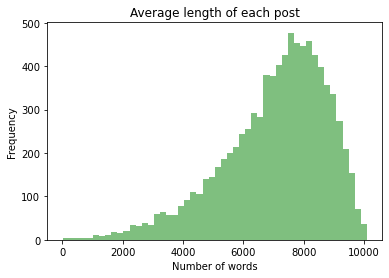

In [74]:
clear_df['postlen'].plot.hist(bins=50,color='green',alpha=0.5)
plt.title("Average length of each post")
plt.xlabel("Number of words")
plt.show()

In [75]:
test_size = 0.2
train_data,test_data = train_test_split(df,test_size=test_size,random_state=42,stratify=df.type)

In [76]:
train_data.posts,train_length = clear_text(train_data)
test_data.posts,test_length = clear_text(test_data)

In [77]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

vectorizer = TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
vectorizer.fit(train_data.posts)

C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


TfidfVectorizer(max_features=5000, stop_words='english',
                tokenizer=<__main__.Lemmatizer object at 0x0000018A3A557CA0>)

In [78]:
train_post = vectorizer.transform(train_data.posts).toarray()
test_post = vectorizer.transform(test_data.posts).toarray()

In [79]:
train_post.shape, test_post.shape

((6940, 5000), (1735, 5000))

In [80]:
target_encoder = LabelEncoder()
train_target = target_encoder.fit_transform(train_data.type)
test_target = target_encoder.fit_transform(test_data.type)

In [ ]:
#Decision Trees

In [39]:
dtree = DecisionTreeClassifier(random_state=2)
dtree.fit(train_post, train_target)
dtpred = dtree.predict(test_post)

In [40]:
print(classification_report(test_target,dtpred))
print(confusion_matrix(test_target,dtpred))

              precision    recall  f1-score   support

           0       0.21      0.24      0.22        38
           1       0.44      0.49      0.46       135
           2       0.17      0.17      0.17        46
           3       0.40      0.36      0.38       137
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         8
           7       0.26      0.28      0.27        18
           8       0.54      0.57      0.56       294
           9       0.59      0.57      0.58       366
          10       0.48      0.46      0.47       218
          11       0.54      0.51      0.53       261
          12       0.27      0.21      0.24        33
          13       0.30      0.33      0.32        54
          14       0.36      0.32      0.34        41
          15       0.45      0.57      0.50        67

    accuracy                           0.48      1735
   macro avg       0.31   

In [59]:
print('train classification report \n ',classification_report(train_target,dtree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,dtree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       152
        ENFP       1.00      1.00      1.00       540
        ENTJ       1.00      1.00      1.00       185
        ENTP       1.00      1.00      1.00       548
        ESFJ       1.00      1.00      1.00        33
        ESFP       1.00      1.00      1.00        38
        ESTJ       1.00      1.00      1.00        31
        ESTP       1.00      1.00      1.00        71
        INFJ       1.00      1.00      1.00      1176
        INFP       1.00      1.00      1.00      1466
        INTJ       1.00      1.00      1.00       873
        INTP       1.00      1.00      1.00      1043
        ISFJ       1.00      1.00      1.00       133
        ISFP       1.00      1.00      1.00       217
        ISTJ       1.00      1.00      1.00       164
        ISTP       1.00      1.00      1.00       270

    accuracy                           1.00      

In [ ]:
# Random Forest

In [42]:
rf = RandomForestClassifier(n_estimators = 100, random_state=2)
rf.fit(train_post, train_target)
rfpred = rf.predict(test_post)

In [43]:
print(classification_report(test_target,rfpred))
print(confusion_matrix(test_target,rfpred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.72      0.36      0.48       135
           2       0.75      0.07      0.12        46
           3       0.59      0.24      0.34       137
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00        18
           8       0.54      0.66      0.59       294
           9       0.45      0.85      0.59       366
          10       0.59      0.50      0.54       218
          11       0.59      0.72      0.65       261
          12       1.00      0.21      0.35        33
          13       1.00      0.04      0.07        54
          14       1.00      0.10      0.18        41
          15       0.80      0.30      0.43        67

    accuracy                           0.53      1735
   macro avg       0.50   

C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
err_rate = []

for i in range(1400,2001,100):
    
    print(i)
    
    rfc = RandomForestClassifier(n_estimators = i, random_state=2)
    
    rfc.fit(train_post,train_target)
    
    prediction_i = rfc.predict(test_post)
    
    err_rate.append(np.mean(prediction_i != test_target))

1400
1500
1600
1700
1800
1900
2000


Text(0, 0.5, 'Error_Rate')

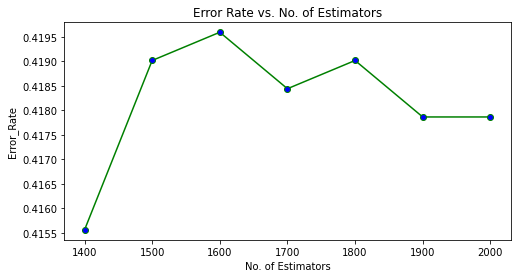

In [84]:
plt.figure(figsize=(8,4))
plt.plot(range(1400,2001,100),err_rate,color='green', 
         marker='o',markerfacecolor='blue')
plt.title('Error Rate vs. No. of Estimators')
plt.xlabel('No. of Estimators')
plt.ylabel('Error_Rate')

In [85]:
rf = RandomForestClassifier(n_estimators = 1400, random_state=2)
rf.fit(train_post, train_target)
rfpred = rf.predict(test_post)

In [86]:
print('train classification report \n ',classification_report(train_target,rf.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,rf.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       152
        ENFP       1.00      1.00      1.00       540
        ENTJ       1.00      1.00      1.00       185
        ENTP       1.00      1.00      1.00       548
        ESFJ       1.00      1.00      1.00        33
        ESFP       1.00      1.00      1.00        38
        ESTJ       1.00      1.00      1.00        31
        ESTP       1.00      1.00      1.00        71
        INFJ       1.00      1.00      1.00      1176
        INFP       1.00      1.00      1.00      1466
        INTJ       1.00      1.00      1.00       873
        INTP       1.00      1.00      1.00      1043
        ISFJ       1.00      1.00      1.00       133
        ISFP       1.00      1.00      1.00       217
        ISTJ       1.00      1.00      1.00       164
        ISTP       1.00      1.00      1.00       270

    accuracy                           1.00      

C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
print('train classification report \n ',classification_report(train_target,rf.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,rf.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      1.00      1.00       152
        ENFP       1.00      1.00      1.00       540
        ENTJ       1.00      1.00      1.00       185
        ENTP       1.00      1.00      1.00       548
        ESFJ       1.00      1.00      1.00        33
        ESFP       1.00      1.00      1.00        38
        ESTJ       1.00      1.00      1.00        31
        ESTP       1.00      1.00      1.00        71
        INFJ       1.00      1.00      1.00      1176
        INFP       1.00      1.00      1.00      1466
        INTJ       1.00      1.00      1.00       873
        INTP       1.00      1.00      1.00      1043
        ISFJ       1.00      1.00      1.00       133
        ISFP       1.00      1.00      1.00       217
        ISTJ       1.00      1.00      1.00       164
        ISTP       1.00      1.00      1.00       270

    accuracy                           1.00      

C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN

In [49]:
# Initializing an empty list to get the error rate for every k 
err_rate = []

# Let's run the for loop for k from 1 to 30, we can use range() method
for i in range(10,51):
    
    # Initializing knn for k = i
    knn = KNeighborsClassifier(n_neighbors=i)
    
    # fitting knn 
    knn.fit(train_post,train_target)
    
    # predicting for k = i
    prediction_i = knn.predict(test_post)
    
    # error rate for k = i - appending to the list 'err_rate'
    # Avg of predictions and y_test if both not equal
    err_rate.append(np.mean(prediction_i != test_target))

Text(0, 0.5, 'Error_Rate')

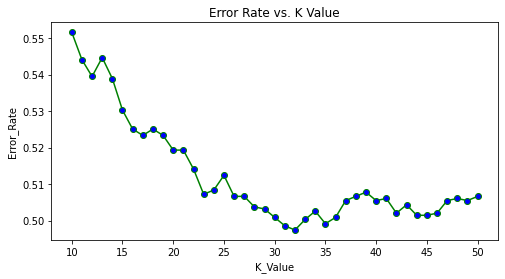

In [50]:
plt.figure(figsize=(8,4))
plt.plot(range(10,51),err_rate,color='green', 
         marker='o',markerfacecolor='blue')
plt.title('Error Rate vs. K Value')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')

In [ ]:
#neighbors = 32

In [ ]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(train_post,train_target)
knnpred = knn.predict(test_post)

In [52]:
print(confusion_matrix(test_target,knnpred))
print(classification_report(test_target,knnpred))

[[ 13   1   1   0   0   0   0   0   6  16   0   0   0   0   0   1]
 [  2  58   2   2   0   0   0   0  20  45   2   0   1   1   1   1]
 [  0   4   9   0   0   0   0   0   8  22   1   0   1   0   0   1]
 [  0   6   0  48   1   0   0   1  36  28   6   8   0   2   0   1]
 [  0   0   0   0   3   0   0   0   4   2   0   0   0   0   0   0]
 [  0   1   1   0   0   0   0   0   2   6   0   0   0   0   0   0]
 [  0   0   0   1   0   0   2   0   3   2   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0  11   1   3   0   0   0   0   0   2]
 [  2   3   0   2   1   0   0   0 190  91   2   2   0   0   0   1]
 [  0   3   0   4   1   0   0   1  25 322   7   3   0   0   0   0]
 [  0   9   0   4   1   0   0   0  45  78  63  12   2   0   3   1]
 [  1   2   1   2   0   0   0   0  40 106   5 102   0   0   2   0]
 [  0   0   0   0   0   0   0   0   5  15   1   0  12   0   0   0]
 [  1   0   0   3   1   0   0   0   8  26   2   0   0  13   0   0]
 [  0   3   0   0   0   0   0   0   3  21   0   4   1   0   9 

C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
print('train classification report \n ',classification_report(train_target,knn.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,knn.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.63      0.28      0.38       152
        ENFP       0.65      0.46      0.54       540
        ENTJ       0.79      0.29      0.42       185
        ENTP       0.79      0.45      0.57       548
        ESFJ       0.45      0.39      0.42        33
        ESFP       0.67      0.05      0.10        38
        ESTJ       0.83      0.16      0.27        31
        ESTP       0.78      0.25      0.38        71
        INFJ       0.48      0.69      0.57      1176
        INFP       0.41      0.90      0.56      1466
        INTJ       0.72      0.30      0.42       873
        INTP       0.77      0.39      0.52      1043
        ISFJ       0.78      0.44      0.56       133
        ISFP       0.82      0.24      0.37       217
        ISTJ       0.73      0.27      0.39       164
        ISTP       0.86      0.23      0.37       270

    accuracy                           0.52      

C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Prerak Gadhi\anaconda3\envs\ddp\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
